# Worksheet  Questions - Stress on Faults

## a) Construct a Mohr circle diagram. 
Consider a normal faulting stress state with vertical
stress $S_v$ = 42.55 MPa and hydrostatic pore pressure $P_p$ = 18.96 MPa. Chose an intermediate
stress such that $\phi$ = 1. Recall that $\phi$ quantifies the relative differences between the three
principal stresses.

$$ \phi = \frac {S_2 - S_3} {S_1 - S_2}$$ 

On a Mohr diagram (e.g., Figure 1), plot effective stresses, $\sigma_i = S_i - P_p$, where i = 1,2,3
corresponds to the principal stresses. Plot the frictional failure line given by $\tau = \mu \sigma_n$,
where $\tau$ is the shear stress, $\sigma_n$ is the normal stress and $\mu$ is the coefficient of sliding friction.
Use $\mu=0.6$, which corresponds to an intermediate value of clay + TOC of 25 wt%.

Normal Faulting Regime requires $S_{Hmin} < S_{Hmax} <S_v $

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [2]:
Sv=42.55
Pp=18.96
mu=0.6

$$\frac{S_v-Pp}{S_{hmin}-P_p}=(\sqrt{\mu^2+1}+\mu)^2$$

$$S_{hmin}-P_p=\frac{S_v-Pp}{(\sqrt{\mu^2+1}+\mu)^2}$$

$$S_{hmin}=\frac{S_v-Pp}{(\sqrt{\mu^2+1}+\mu)^2}+P_p$$

In [3]:
SHmin=(((Sv-Pp)/(np.sqrt(mu**2+1)+mu)**2))+Pp

In [4]:
SHmin

26.52228275214385

In [5]:
SHmax=(Sv+SHmin)/2

In [6]:
SHmax

34.536141376071924

In [7]:
(Sv-Pp)/(SHmin-Pp)

3.1194284547628714

In [8]:
(SHmax-SHmin)/(Sv-SHmax)

1.0000000000000004

In [9]:
theta=np.arange(-90,0,1)
sigma1=Sv-Pp
sigma2=SHmax-Pp
sigma3=SHmin-Pp
t12=-0.5*(sigma1-sigma2)*np.sin(2*theta*np.pi/180)
t23=-0.5*(sigma2-sigma3)*np.sin(2*theta*np.pi/180)
t13=-0.5*(sigma1-sigma3)*np.sin(2*theta*np.pi/180)
n12=0.5*(sigma1+sigma2)+0.5*(sigma1-sigma2)*np.cos(2*theta*np.pi/180)
n23=0.5*(sigma2+sigma3)+0.5*(sigma2-sigma3)*np.cos(2*theta*np.pi/180)
n13=0.5*(sigma1+sigma3)+0.5*(sigma1-sigma3)*np.cos(2*theta*np.pi/180)
sigma_n_MC=np.arange(np.max(n13))
tau_MC=0.6*sigma_n_MC

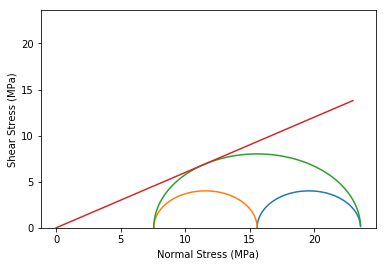

In [10]:
plt.plot(n12,t12)
plt.plot(n23,t23)
plt.plot(n13,t13)
plt.plot(sigma_n_MC,tau_MC)
plt.xlabel("Normal Stress (MPa)")
plt.ylabel("Shear Stress (MPa)")
plt.ylim(0,np.max(n13))
plt.show()

## b) Plot the stress on fault planes.

Assume S Hmax is orientated E-W (Strike = 90°). Consider the fault plane orientations in the table below.

The shear and normal stress on each fault plane is called by first rotating the principal stresses into geographic coordinates and then to the fault coordinate system. The details of this method are provided in the reference below.

In [11]:
Strike=np.array([90,60,45,30,90])
Dip=np.array([60,90,45,0,30])
Shear=np.array([7.16,3.57,6.85,0,7.16])
Normal=np.array([11.19,9.13,17.4,23.59,19.46])

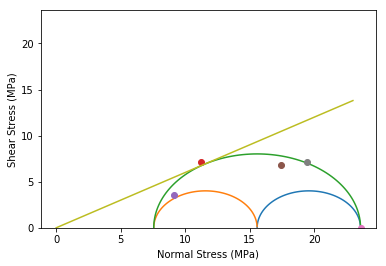

In [12]:
plt.plot(n12,t12)
plt.plot(n23,t23)
plt.plot(n13,t13)
plt.plot(Normal[0],Shear[0],marker='o')
plt.plot(Normal[1],Shear[1],marker='o')
plt.plot(Normal[2],Shear[2],marker='o')
plt.plot(Normal[3],Shear[3],marker='o')
plt.plot(Normal[4],Shear[4],marker='o')
plt.plot(sigma_n_MC,tau_MC)
plt.xlabel("Normal Stress (MPa)")
plt.ylabel("Shear Stress (MPa)")
plt.ylim(0,np.max(n13))
plt.show()

## c) Calculate the Coulomb Failure Function. 
The Coulomb Failure Function (CFF) is a
measure of how close faults are to failure $CFF = \tau - \mu \sigma_n$ . Compute the CFF for each of
the fault planes. Which of the fault planes is critically-stressed (most likely to be activated
during stimulation)?

In [13]:
CFF=Shear-mu*Normal

If CFF is larger than zero the Fault is critically stressed.

In [14]:
(CFF>0)

array([ True, False, False, False, False])

In [15]:
CFF

array([  0.446,  -1.908,  -3.59 , -14.154,  -4.516])

## d) Shear stimulation of faults. 
Consider the effects of increasing pore pressure during hydraulic stimulation in terms of an actual fracture dataset. Refer to the file “HW4_Fracture Data.txt”, which contains a data similar to Table 1. The first two columns are the strike and dip of fracture planes. The next two columns are the shear and normal stresses acting on these fractures under hydrostatic pore pressure conditions (P p = 18.96 MPa). The two last columns are the shear and normal stresses acting on these faults after increasing the pore pressure by 3 MPa. 

Perform the same Mohr circle analysis and compute the CFF for each fracture. Now consider an increase in pore pressure of 3 MPa and repeat the analysis. How many fractures are likely to activated as a result of hydraulic stimulation?

In [16]:
import pandas as pd

In [17]:
data=pd.read_csv("GP208_HW4_Fracture_Data.txt",delimiter="\t")
data.columns=["strike","dip","shear_hydro","normal_hydro","shear_over","normal_over","unknown"]

In [18]:
strike=data.strike.values
dip=data.dip.values
shear_hydro=data.shear_hydro.values
normal_hydro=data.normal_hydro.values
shear_over=data.shear_over.values
normal_over=data.normal_over.values

In [19]:
CFF_hydro=shear_hydro-mu*normal_hydro
CFF_over=shear_over-mu*normal_over

In [20]:
(CFF_hydro>0).sum()

0

In [21]:
(CFF_over>0).sum() 

154

# Assignment Questions

## Question 1


What is the value of the minimum horizontal stress (Shmin) in MPa? Enter the numerical value without units.



Shmin cannot be lower than the Pp otherwise the earth would self hydro-fracture.

In [22]:
SHmin

26.52228275214385

What is the value of the maximum horizontal stress (SHmax) in MPa? Enter the numerical value without units.

In order to satisfy $\phi = 1$ the maximum horizontal stress must lie halfway between $S_v$ and $S_Hmin$.

In [23]:
SHmax

34.536141376071924

## Question 2 


What does φ = 1 signify?

The intermediate principal stress is close to the maximum principal stress

The intermediate principal stress is halfway between the maximum and minimum principal stresses correct

The intermediate principal stress is close to the minimum principal stress 

* The intermediate principal stress is halfway between the maximum and minimum principal stresses correct


## Question 3

Which fault plane is critically-stressed (most likely to be activated during stimulation)?

In [24]:
np.argmax(CFF)+1

1

Which fault plane has the lowest value of the Coulomb Failure Function (CFF)?


In [26]:
np.argmin(CFF)+1

4

## Question 4

How many fractures are activated in shear after increasing the pore pressure by 3 MPa?



In [27]:
(CFF_over>0).sum() 

154

What is the average value of the CFF for the fractures that exceed the Coulomb failure criterion?

In [28]:
((CFF_over>0)*CFF_over).sum()/((CFF_over>0).sum() )

0.7778013686792209